In [111]:
import pandas as pd

kc_houses = pd.read_csv('/Users/flatironschool/Documents/dsc-v2-mod1-final-project-houston-ds-060319/kc_house_data.csv')

In [112]:
kc_houses['was_renovated']= kc_houses['yr_renovated'].fillna(0)
temp = kc_houses['was_renovated'].astype(bool).astype(int)
kc_houses['was_renovated'] = temp
kc_houses.drop(columns = ['yr_renovated'],inplace =True)

In [113]:
kc_houses['waterfront'].fillna(0,inplace=True)

In [114]:
no_view = kc_houses['view'].isna()
kc_houses.drop(kc_houses[no_view].index,inplace=True)

In [115]:
no_basement = kc_houses['sqft_basement']=='?'
kc_houses = kc_houses.drop(kc_houses[no_basement].index)

In [116]:
kc_houses['sqft_basement'] = kc_houses['sqft_basement'].apply(lambda x: float(x))

In [117]:
too_many_bedrooms = kc_houses[kc_houses['bedrooms']>15]
kc_houses.drop(too_many_bedrooms.index,inplace =True)
kc_houses.drop(kc_houses[kc_houses['price']>6000000].index,inplace=True)

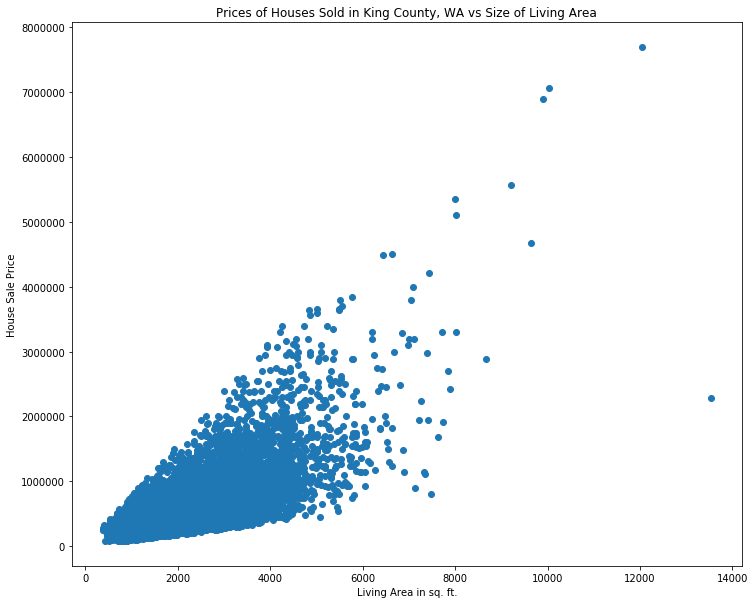

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,10))
plt.scatter(kc_houses['sqft_living'],kc_houses['price'])
plt.xlabel('Living Area in sq. ft.')
plt.ylabel('House Sale Price')
plt.title('Prices of Houses Sold in King County, WA vs Size of Living Area')
plt.show()

In [32]:
# plt.savefig('price_vs_sqft_living_scatter.pdf')

<Figure size 432x288 with 0 Axes>

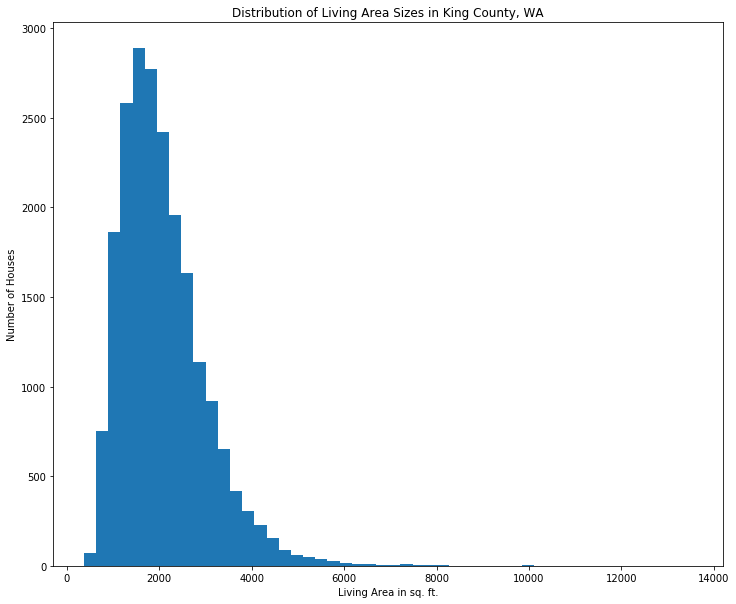

In [68]:
plt.figure(figsize = (12,10))
plt.hist(kc_houses['sqft_living'], bins = 50)
plt.xlabel('Living Area in sq. ft.')
plt.ylabel('Number of Houses')
plt.title('Distribution of Living Area Sizes in King County, WA')
plt.savefig('sqft_living_hist.pdf')
plt.show()

In [34]:
plt.savefig('sqft_living_hist.pdf')

<Figure size 432x288 with 0 Axes>

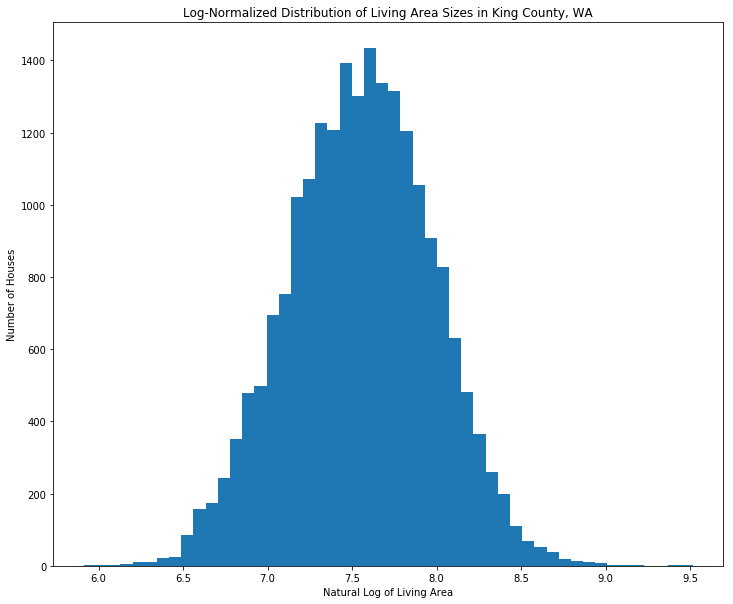

In [67]:
import numpy as np
plt.figure(figsize = (12,10))
plt.hist(np.log(kc_houses['sqft_living']), bins = 50)
plt.xlabel('Natural Log of Living Area')
plt.ylabel('Number of Houses')
plt.title('Log-Normalized Distribution of Living Area Sizes in King County, WA')
plt.savefig('log_normalized_living_sqft_dist.pdf')
plt.show()

In [36]:
# plt.savefig('log_normalized_living_sqft_dist.pdf')

<Figure size 432x288 with 0 Axes>

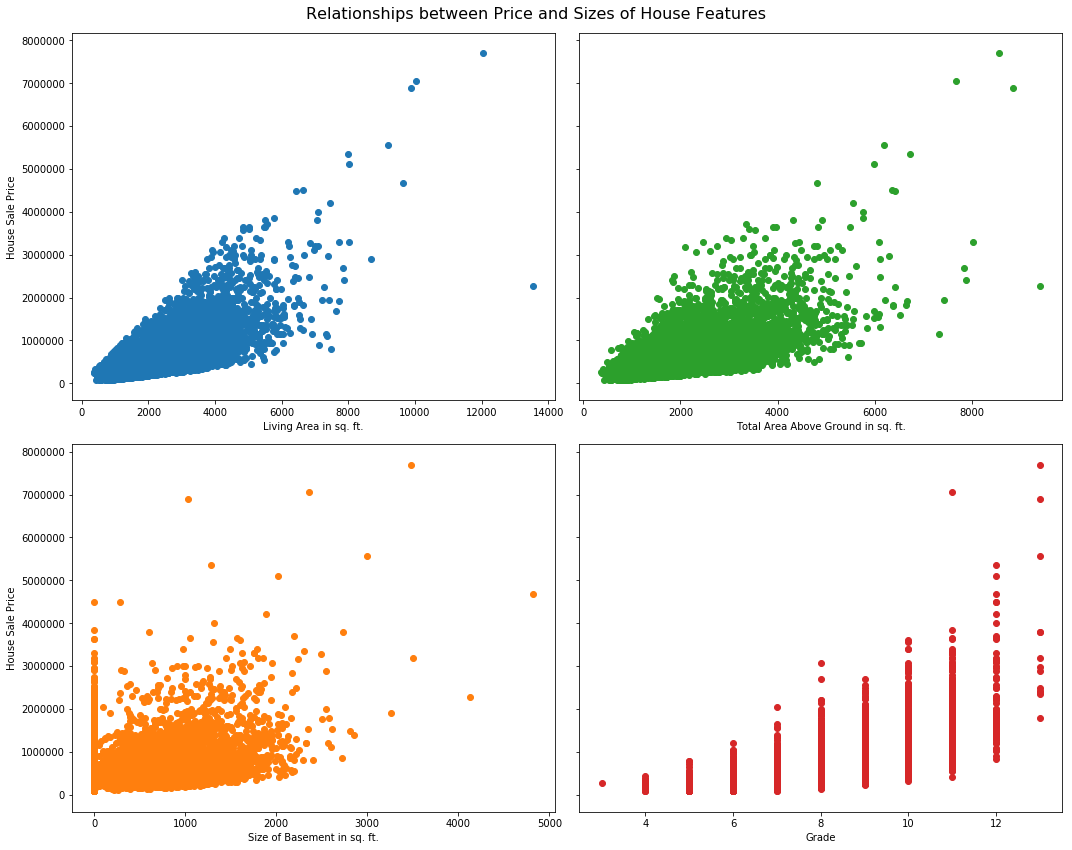

In [99]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, sharey= True, figsize = (15,12))
ax1.scatter(kc_houses['sqft_living'],kc_houses['price'])
ax1.set_xlabel('Living Area in sq. ft.')
ax1.set_ylabel('House Sale Price')
ax2.scatter(kc_houses['sqft_above'],kc_houses['price'], c='C2')
ax2.set_xlabel('Total Area Above Ground in sq. ft.')
ax3.scatter(kc_houses['sqft_basement'],kc_houses['price'],c ='C1')
ax3.set_xlabel('Size of Basement in sq. ft.')
ax3.set_ylabel('House Sale Price')
ax4.scatter(kc_houses['grade'],kc_houses['price'], c= 'C3')
ax4.set_xlabel('Grade')
plt.subplots_adjust(wspace = 0.1,hspace = 0.15)
fig.suptitle('Relationships between Price and Sizes of House Features',fontsize = 16)
fig.tight_layout()
fig.subplots_adjust(top = 0.95)
plt.savefig('scatter_grid.pdf')
plt.show()

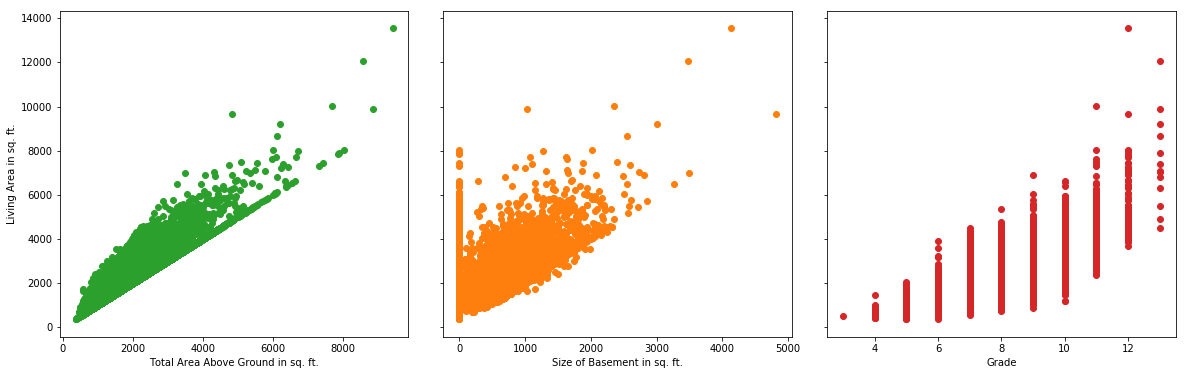

In [98]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, sharey= True, figsize = (20,6))
ax1.scatter(kc_houses['sqft_above'],kc_houses['sqft_living'],c = 'C2')
ax1.set_xlabel('Total Area Above Ground in sq. ft.')
ax1.set_ylabel('Living Area in sq. ft.')
ax2.scatter(kc_houses['sqft_basement'], kc_houses['sqft_living'], c= 'C1')
ax2.set_xlabel('Size of Basement in sq. ft.')
ax3.scatter(kc_houses['grade'],kc_houses['sqft_living'], c = 'C3')
ax3.set_xlabel('Grade')
# ax3.set_ylabel('Living Area in sq. ft.')
plt.subplots_adjust(wspace = 0.1)
plt.savefig('correlation_w_sqft_living')
plt.show()

In [50]:
import seaborn as sns

In [54]:
subset = kc_houses[['price','sqft_living','sqft_above','sqft_basement','grade']]

In [ ]:
g = sns.FacetGrid(subset,)
sns.lmplot(x= 'sqft_living',y='price',data = kc_houses)

In [100]:
kc_houses['log_sqft_liv']=np.log(kc_houses['sqft_living'])

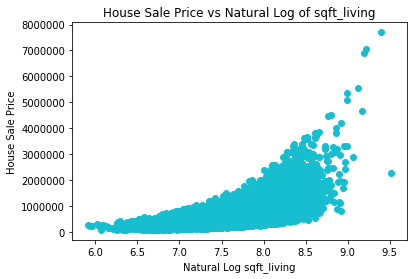

In [104]:
plt.scatter(kc_houses['log_sqft_liv'],kc_houses['price'],c='C9')
plt.xlabel('Natural Log sqft_living')
plt.ylabel('House Sale Price')
plt.title('House Sale Price vs Natural Log of sqft_living')
plt.savefig('price_vs_log_sqft')

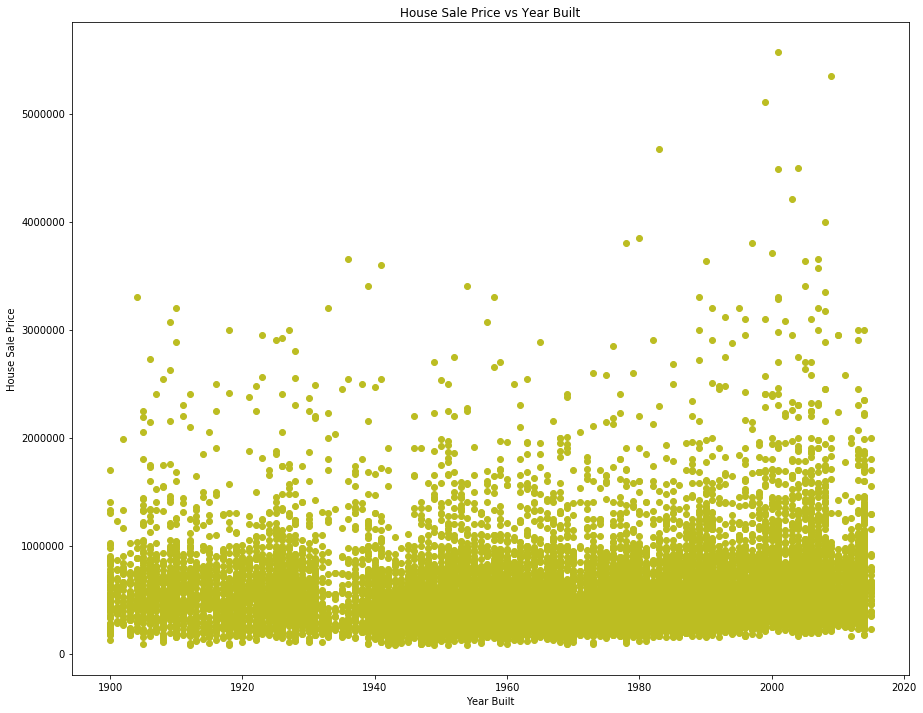

In [120]:
plt.figure(figsize = (15,12))
plt.scatter(kc_houses['yr_built'],kc_houses['price'], c= 'C8')
plt.xlabel('Year Built')
plt.ylabel('House Sale Price')
plt.title('House Sale Price vs Year Built')
plt.savefig('price_vs_year_built_minus_outliers')

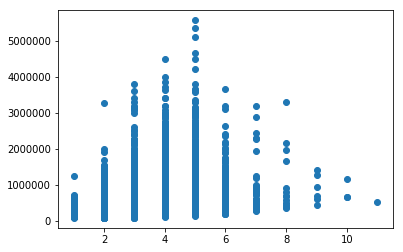

In [121]:
plt.scatter(kc_houses['bedrooms'],kc_houses['price'])

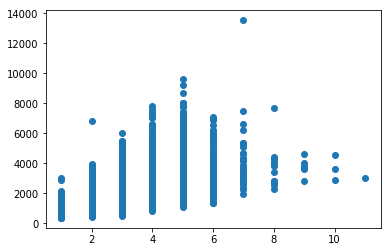

In [122]:
plt.scatter(kc_houses['bedrooms'],kc_houses['sqft_living'])

In [123]:
kc_houses.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated
id,1.000000,-0.020452,0.003025,0.004768,-0.013760,-0.132532,0.018904,-0.004649,0.012157,-0.023261,0.008000,-0.012407,-0.005257,0.022245,-0.010787,-0.005143,0.021271,-0.003753,-0.138272,-0.009727
price,-0.020452,1.000000,0.316942,0.523309,0.698685,0.089483,0.259574,0.257700,0.397754,0.035649,0.674680,0.601984,0.319220,0.058244,-0.053374,0.313754,0.023970,0.593040,0.084389,0.110079
bedrooms,0.003025,0.316942,1.000000,0.526857,0.593688,0.033570,0.184100,-0.002522,0.081628,0.022523,0.365400,0.492026,0.307680,0.162400,-0.157054,-0.011823,0.136218,0.402666,0.031861,0.017701
bathrooms,0.004768,0.523309,0.526857,1.000000,0.753539,0.088376,0.504170,0.060707,0.184598,-0.128526,0.665039,0.684036,0.279257,0.510975,-0.204321,0.024883,0.225651,0.568695,0.089269,0.044843
sqft_living,-0.013760,0.698685,0.593688,0.753539,1.000000,0.173824,0.354807,0.099368,0.281050,-0.061925,0.763075,0.875672,0.430575,0.322756,-0.199624,0.052842,0.243477,0.757382,0.185529,0.045040
sqft_lot,-0.132532,0.089483,0.033570,0.088376,0.173824,1.000000,-0.007825,0.020980,0.072536,-0.009168,0.113707,0.184022,0.015392,0.052508,-0.129589,-0.085104,0.230505,0.143729,0.719502,0.004190
floors,0.018904,0.259574,0.184100,0.504170,0.354807,-0.007825,1.000000,0.019389,0.027124,-0.264263,0.458997,0.524594,-0.247009,0.490202,-0.058381,0.049190,0.125423,0.279038,-0.011704,0.002250
waterfront,-0.004649,0.257700,-0.002522,0.060707,0.099368,0.020980,0.019389,1.000000,0.380844,0.016730,0.080712,0.066803,0.080558,-0.023842,0.029628,-0.012105,-0.036722,0.082410,0.030027,0.068228
view,0.012157,0.397754,0.081628,0.184598,0.281050,0.072536,0.027124,0.380844,1.000000,0.045614,0.248395,0.163626,0.275172,-0.054257,0.085643,0.005918,-0.076221,0.279740,0.072584,0.087236
condition,-0.023261,0.035649,0.022523,-0.128526,-0.061925,-0.009168,-0.264263,0.016730,0.045614,1.000000,-0.148999,-0.159721,0.170507,-0.361781,0.002480,-0.016119,-0.105703,-0.093457,-0.004300,-0.055823
